In [29]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
import os
from IPython.display import clear_output

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
X_dir = '/content/drive/MyDrive/Quantum DS Test Task 4/cropped_data/cropped_raster'
y_dir = '/content/drive/MyDrive/Quantum DS Test Task 4/cropped_data/cropped_mask'
df = pd.read_csv('/content/drive/MyDrive/Quantum DS Test Task 4/cropped_data/cropped_mask/files_that_have_erosion.csv')
X_file_names = os.listdir(X_dir)[2:]
y_file_names = os.listdir(y_dir)[1:]

In [4]:
df['masked'] = df['masked'].str[5:10]

In [5]:
file_nums = df['masked'].to_list()

In [6]:
len(file_nums)

369

In [7]:
def get_xy_data(mask_or_raster, file_nums, dir):
  xy = []
  num_files = len(file_nums)
  for file_num in file_nums:
    clear_output(wait=True)
    print('Processed %.2f%% of %s data' %(((file_nums.index(file_num)+1)/num_files*100), mask_or_raster))
    img_array = cv2.imread(dir + '/' + mask_or_raster+'_'+file_num+'.png')
    img_array = cv2.resize(img_array, (128,128), interpolation = cv2.INTER_AREA)
    xy.append(img_array)
  return xy

In [116]:
X = get_xy_data('raster', file_nums, X_dir)
y = get_xy_data('mask', file_nums, y_dir)

Processed 100.00% of mask data


In [117]:
X = np.array(X)
y = np.array(y)

In [120]:
test_X = X[:37]/255
test_y = y[:37]/255

In [122]:
X = X[37:]/255
y = y[37:]/255

In [98]:
len(y)

295

In [99]:
X[0].shape

(128, 128, 3)

In [123]:
dataset = tf.data.Dataset.from_tensor_slices((X, y))

In [101]:
train_size = 295
val_size = 37

In [124]:
train_ds = dataset.take(train_size)    
val_ds = dataset.skip(train_size).take(val_size)

In [125]:
BATCH_SIZE = 10
# SHUFFLE_BUFFER_SIZE = 100
train_dataset = train_ds.batch(BATCH_SIZE)
validation_dataset = val_ds.batch(BATCH_SIZE)

In [104]:
validation_dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float64, name=None))>

In [105]:
train_dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float64, name=None))>

In [126]:
in_shape=(128,128,3)
model1=keras.Sequential(
[
    # resize_and_rescale,
    layers.Conv2D(32,(3,3),activation="relu",input_shape=in_shape,padding='same'),
    layers.Dropout(0.1),
    layers.Conv2D(32,(3,3),activation="relu",input_shape=in_shape,padding='same'),
    layers.MaxPooling2D((2,2)),
    

    layers.Conv2D(64,  kernel_size = (3,3), activation='relu',padding='same'),
    layers.Dropout(0.1),
    layers.Conv2D(64,(3,3),activation="relu",input_shape=in_shape,padding='same'),
    layers.MaxPooling2D((2, 2)),
 

    layers.Conv2D(128,  kernel_size = (3,3), activation='relu',padding='same'),
    layers.Dropout(0.1),
    layers.Conv2D(128,(3,3),activation="relu",input_shape=in_shape,padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256,  kernel_size = (3,3), activation='relu',padding='same'),
    layers.MaxPooling2D((2, 2)),
 
    layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same'),
    layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same'),
    layers.Dropout(0.2),
    layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same'),

    layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same'),
    layers.Dropout(0.2),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same'),
 
    layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same'),
    layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same'),
    layers.Dropout(0.2),
    layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same'),

    layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same'),
    layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same'),
    layers.Dropout(0.2),
    layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same'),


    layers.Conv2D(3, (1, 1), activation='linear')
     
]
)
model1.build(input_shape=in_shape)

model1.compile(
    optimizer= keras.optimizers.Adam(learning_rate=0.007),
    #'adam',
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [127]:
history = model1.fit(train_dataset, validation_data=validation_dataset, epochs=10)

Epoch 1/10
30/30 [==============================] - 9s 53ms/step - loss: 0.0933 - accuracy: 0.3302 - val_loss: 0.0805 - val_accuracy: 0.1262
Epoch 2/10
30/30 [==============================] - 1s 38ms/step - loss: 0.0801 - accuracy: 0.2970 - val_loss: 0.0805 - val_accuracy: 0.4657
Epoch 3/10
30/30 [==============================] - 1s 38ms/step - loss: 0.0801 - accuracy: 0.2782 - val_loss: 0.0805 - val_accuracy: 0.4709
Epoch 4/10
30/30 [==============================] - 1s 37ms/step - loss: 0.0800 - accuracy: 0.2880 - val_loss: 0.0805 - val_accuracy: 0.6116
Epoch 5/10
30/30 [==============================] - 1s 38ms/step - loss: 0.0800 - accuracy: 0.2862 - val_loss: 0.0805 - val_accuracy: 0.6978
Epoch 6/10
30/30 [==============================] - 1s 37ms/step - loss: 0.0800 - accuracy: 0.2867 - val_loss: 0.0805 - val_accuracy: 0.7038
Epoch 7/10
30/30 [==============================] - 1s 38ms/step - loss: 0.0800 - accuracy: 0.2898 - val_loss: 0.0805 - val_accuracy: 0.7212
Epoch 8/10
30

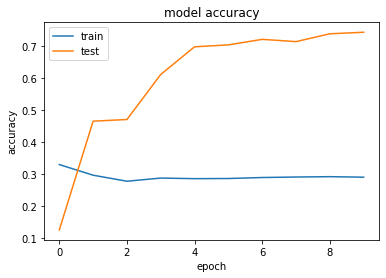

In [128]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

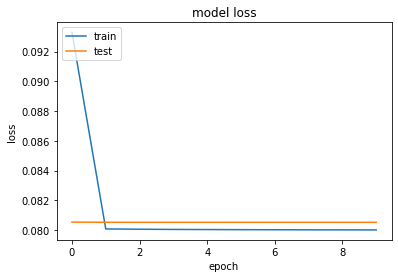

In [129]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [151]:
score = model1.evaluate(test_X, test_y, verbose = 0) 

In [152]:
score

[0.09849080443382263, 0.7453959584236145]